In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = pd.read_csv("./p1/uspsdata.txt", 
                 sep="\t", 
                 header=None)
y = pd.read_csv("./p1/uspscl.txt", 
                 sep="\t", 
                 header=None)

print(X.shape)
print(y.shape)

(200, 256)
(200, 1)


In [3]:
X=np.array(X)
y=np.array(y)
y=y.ravel()

In [4]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=28,
                                                    stratify=y)

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 256)
(160,)
(40, 256)
(40,)


In [54]:
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn import svm
import math

def calc_params(X,y, clf, test_size_num,param_values, param_name,kernel_name,r_s,K):
    c_lst=[]
    if K==0:
        x_train, x_test, y_train, y_test = train_test_split(X,
                                                            y,
                                                            test_size=test_size_num,
                                                            random_state=r_s,
                                                            stratify=y)     
        
        #for i, param_value in enumerate(param_values):
            #model = clf.set_params(**{"C":param_value,"random_state":r_s})
            model=clf
            model = model.fit(x_train,y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)
            c_lst.append(param_value)
            train_score.append(accuracy_score(np.array(y_train), pred_train))
            test_score.append(accuracy_score(np.array(y_test), pred_test))
    #print(np.array(y_train))
    #print(pred_train)
    return c_lst,train_score, test_score

IndentationError: unexpected indent (<ipython-input-54-c83e0960e564>, line 18)

In [55]:
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn import svm
import math

def calc_params(x_train,x_test,y_train, clf):
    model=clf
    model = model.fit(x_train,y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    return pred_train, pred_test

def calc_accuracy(pred_train, pred_test, y_train, y_test):
    train_score = accuracy_score(y_train, pred_train)
    test_score = accuracy_score(y_test, pred_test)
    return train_score, test_score

In [65]:
#math.log(param_values[0])

[-230.25850929940458,
 -115.12925464970229,
 -69.07755278982137,
 -52.95945713886305,
 -57.564627324851145,
 -46.051701859880914,
 -39.14394658089878,
 -34.538776394910684,
 -23.025850929940457,
 -18.420680743952367,
 -16.11809565095832,
 -13.815510557964274,
 -11.512925464970229]

    log_c_value  train_score  test_score
0   -230.258509       0.9750       0.925
1   -115.129255       0.9750       0.925
2    -69.077553       0.9750       0.925
3    -52.959457       0.9750       0.925
4    -57.564627       0.9750       0.925
5    -46.051702       0.9625       0.925
6    -39.143947       0.9625       0.925
7    -34.538776       0.9625       0.925
8    -23.025851       0.9625       0.925
9    -18.420681       0.9625       0.925
10   -16.118096       0.9875       0.925
11   -13.815511       0.9875       0.925
12   -11.512925       1.0000       0.925
13    -6.907755       1.0000       0.925
14     0.000000       1.0000       0.925
15     4.605170       1.0000       0.925
16     6.907755       1.0000       0.925
17     9.210340       1.0000       0.925


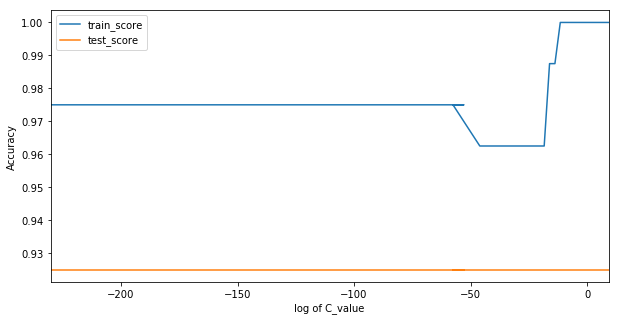

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=test_size_num,
                                                    random_state=r_s,
                                                    stratify=y)

param_values=[1e-100,1e-50,1e-30,1e-23,1e-25,1e-20,1e-17,1e-15,1e-10,1e-8,1e-7,1e-6,1e-5,1e-3,1,100,1000,10000]
param_name = "C"
kernel_name="linear"
r_s = 28
K=0
test_size_num = 0.2

train_score_lst=[]
test_score_lst=[]

for param_value in param_values:
    clf = svm.SVC(C = param_value, random_state=r_s, kernel=kernel_name)
    pred_train, pred_test = calc_params(x_train,x_test,y_train, clf)
    train_score, test_score = calc_accuracy(pred_train, pred_test, y_train, y_test)
    train_score_lst.append(train_score)
    test_score_lst.append(test_score)

param_values_lst = list(map(math.log,param_values))
df = pd.DataFrame(list(zip(param_values_lst,train_score_lst,test_score_lst)), 
                  columns=("log_c_value","train_score","test_score"))
print(df)
df.plot(x="log_c_value", figsize=(10,5))
plt.xlabel('log of C_value')
plt.ylabel("Accuracy")
plt.show()

         c_value  gamma_value  train_score  test_score
0  1.000000e-100   -16.118096      0.91250       0.900
1  1.000000e-100   -13.815511      0.93125       0.900
2  1.000000e-100   -11.512925      1.00000       0.950
3  1.000000e-100    -9.210340      1.00000       0.950
4  1.000000e-100    -6.907755      1.00000       0.925
        c_value  gamma_value  train_score  test_score
0  1.000000e-50   -16.118096      0.91250       0.900
1  1.000000e-50   -13.815511      0.93125       0.900
2  1.000000e-50   -11.512925      1.00000       0.950
3  1.000000e-50    -9.210340      1.00000       0.950
4  1.000000e-50    -6.907755      1.00000       0.975
        c_value  gamma_value  train_score  test_score
0  1.000000e-30   -16.118096      0.91250       0.900
1  1.000000e-30   -13.815511      0.93125       0.900
2  1.000000e-30   -11.512925      1.00000       0.950
3  1.000000e-30    -9.210340      1.00000       0.950
4  1.000000e-30    -6.907755      1.00000       0.975
        c_value  gamma

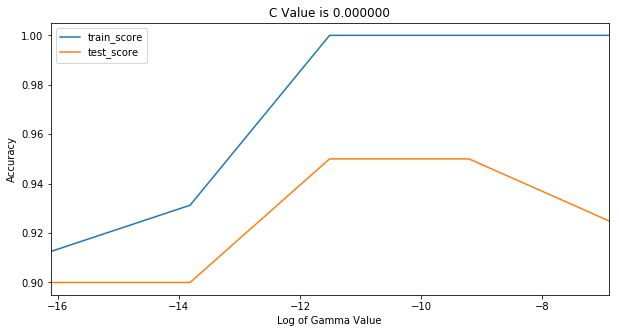

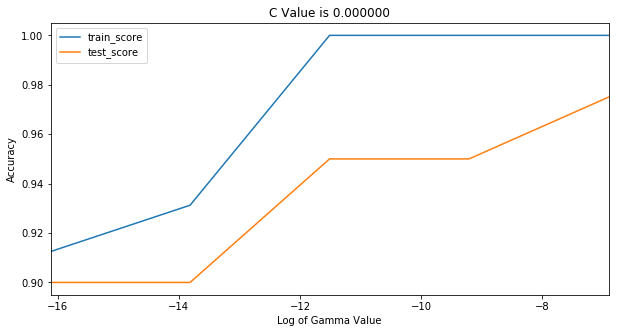

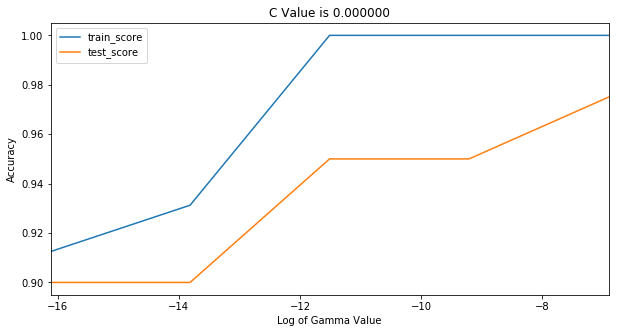

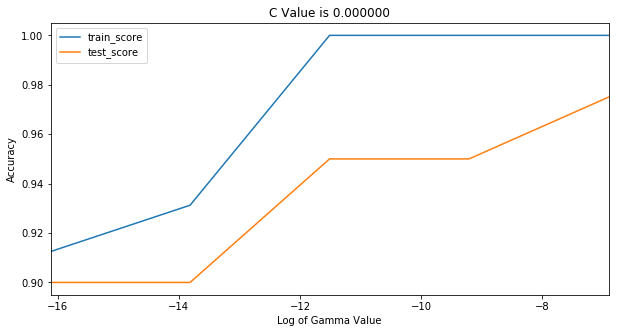

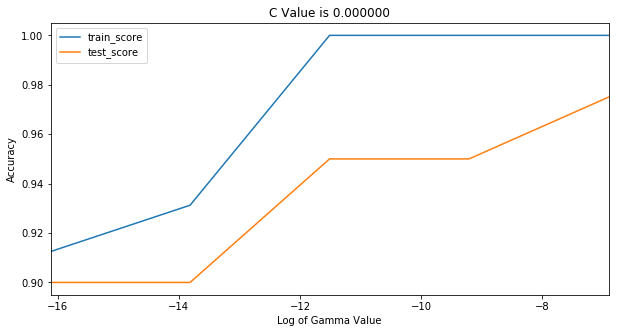

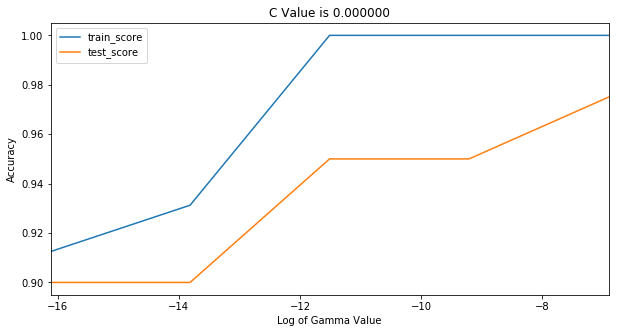

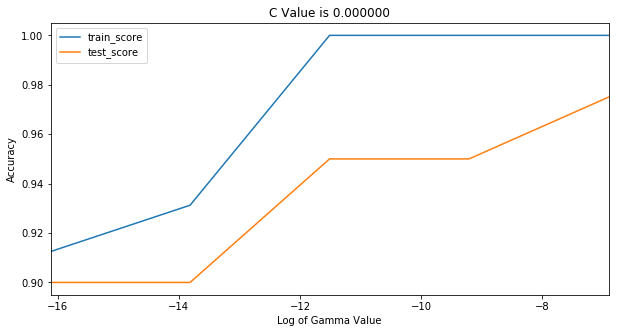

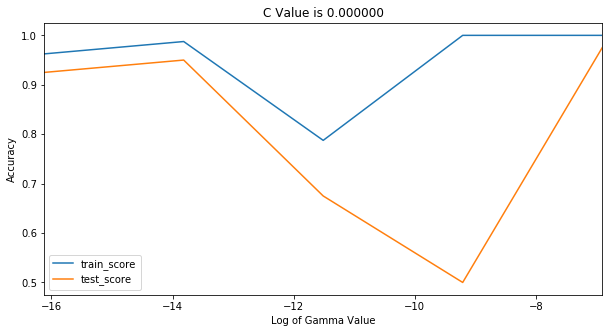

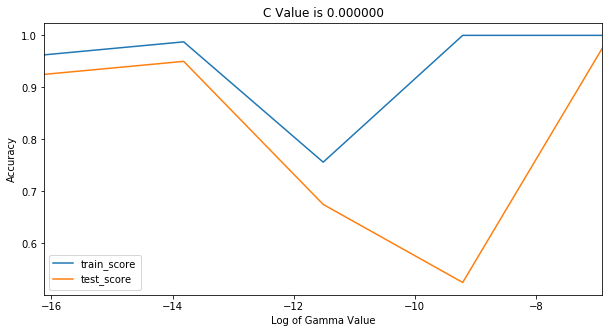

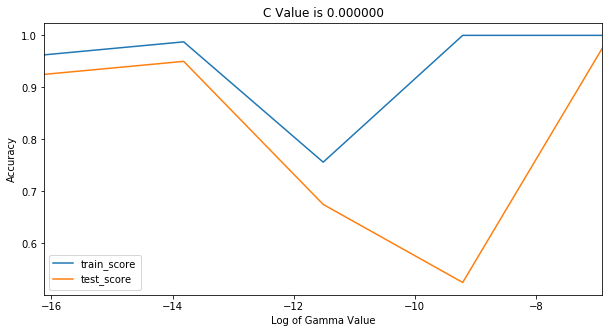

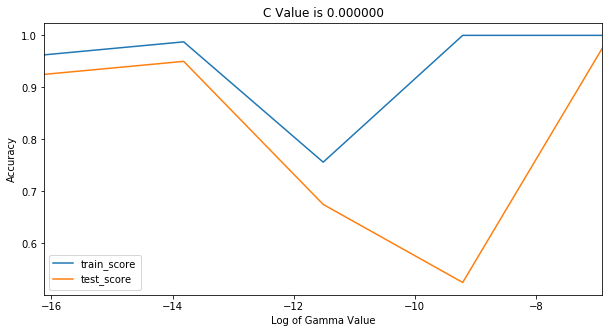

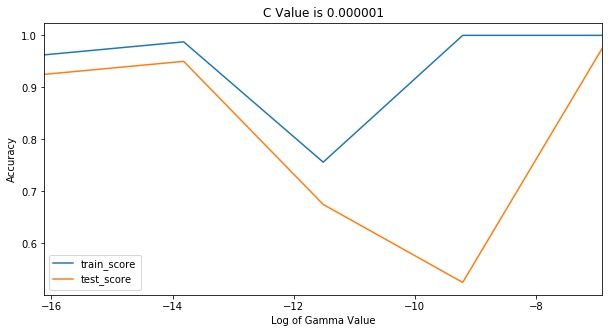

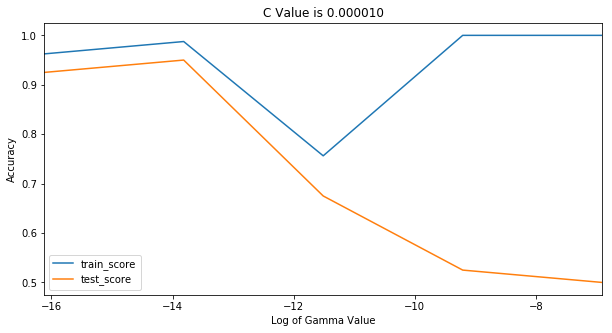

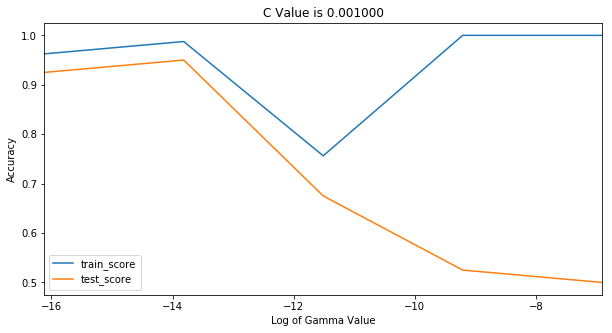

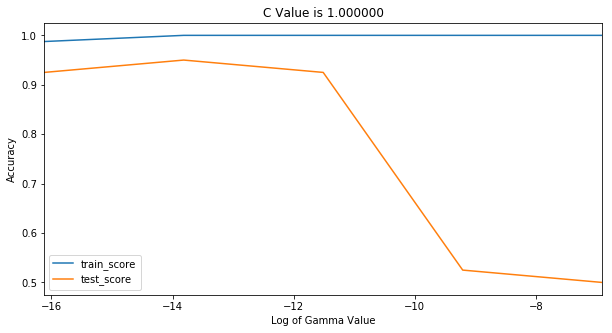

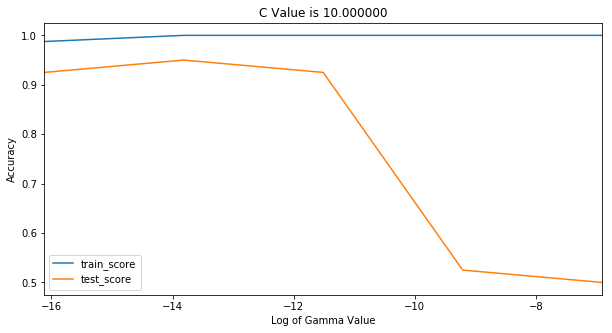

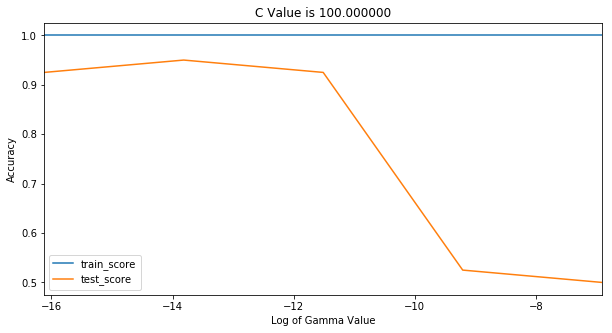

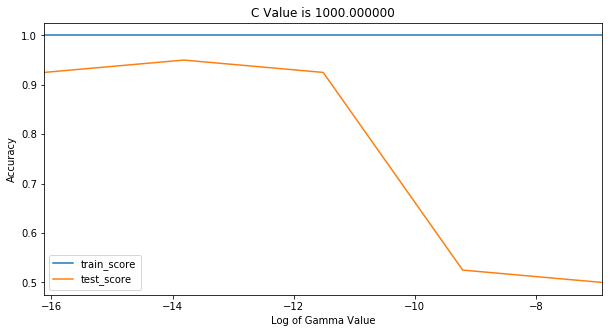

In [82]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=test_size_num,
                                                    random_state=r_s,
                                                    stratify=y)

param_values=[1e-100,1e-50,1e-30,1e-23,1e-25,1e-20,1e-17,1e-15,1e-10,1e-8,1e-7,1e-6,1e-5,1e-3,1,10,100,1000]
gamma_values=[0.0000001,0.000001,0.00001,0.0001,0.001]
param_name = "C"
kernel_name="rbf"
r_s = 28
K=0
test_size_num = 0.2




for param_value in param_values:
    train_score_lst=[]
    test_score_lst=[]
    C_lst=[]
    gamma_lst=[]
    for gamma_value in gamma_values:
        clf = svm.SVC(C = param_value, random_state=r_s, kernel=kernel_name,gamma=gamma_value )
        pred_train, pred_test = calc_params(x_train,x_test,y_train, clf)
        train_score, test_score = calc_accuracy(pred_train, pred_test, y_train, y_test)
        train_score_lst.append(train_score)
        test_score_lst.append(test_score)
        C_lst.append(param_value)
        gamma_lst.append(gamma_value)
   
    gamma_lst = list(map(math.log,gamma_lst))
    df = pd.DataFrame(list(zip(C_lst, gamma_lst,train_score_lst,test_score_lst)),
                 columns=("c_value","gamma_value","train_score","test_score"))
    print(df)
    df.ix[:,1:].plot(x="gamma_value", figsize=(10,5))
    plt.title("C Value is %f"%(df.c_value[0]))
    plt.xlabel("Log of Gamma Value")
    plt.ylabel("Accuracy")
    

In [95]:
#Verify the Accuracy of the Linear Model with Soft Margin (C = 1e-20) 
model = svm.SVC(C =1e-20 , random_state=r_s, kernel="linear")
model = model.fit(x_train,y_train)
pred_train = model.predict(x_train)
print("The Best Choosen SVM Linear Model with Soft Margin (C = 1e-20)")

print("Accuracy of Linear SVM Model on Training set is ",accuracy_score(y_train,pred_train)*100,"%")

pred_test = model.predict(x_test)
print("Accuracy of Linear SVM Model on Testing set is ",accuracy_score(y_test,pred_test)*100,"%")

The Best Choosen SVM Linear Model with Soft Margin (C = 1e-20)
Accuracy of Linear SVM Model on Training set is  96.25 %
Accuracy of Linear SVM Model on Testing set is  92.5 %


In [97]:
#Verify the Accuracy of the Non-Linear Model with Soft Margin (C = 1.000000e-50) and Gaussian Kernel(gamma=0.001)
model = svm.SVC(C =1.000000e-50 , random_state=r_s, kernel="rbf",gamma=0.001 )
model = model.fit(x_train,y_train)
pred_train = model.predict(x_train)

print("The Best Choosen SVM non-Linear Model with Soft Margin(C = 1.0e-50) and Gaussian Kernel(gamma=0.001)")
print("Accuracy of Non-Linear SVM Model on Training set is ",accuracy_score(y_train,pred_train)*100,"%")

pred_test = model.predict(x_test)
print("Accuracy of Non-Linear SVM Model on Testing set is ",accuracy_score(y_test,pred_test)*100,"%")


The Best Choosen SVM non-Linear Model with Soft Margin(C = 1.0e-50) and Gaussian Kernel(gamma=0.001)
Accuracy of Non-Linear SVM Model on Training set is  100.0 %
Accuracy of Non-Linear SVM Model on Testing set is  97.5 %


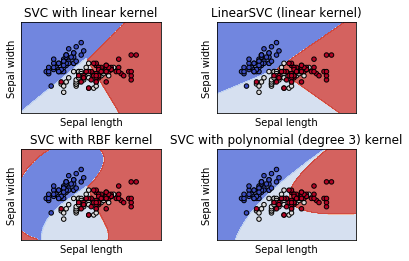

In [68]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

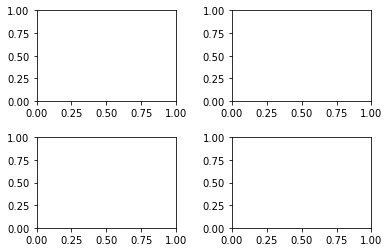

In [76]:
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

In [82]:
xx.ravel[]

SyntaxError: invalid syntax (<ipython-input-82-ada78e25051a>, line 1)